In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])

# Quick view
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
# Summary of numeric columns
df.describe()

# Missing values
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
missing_df[missing_df['Percent'] > 5]


,Missing Count,Percent
Comments,525600,100.0


In [3]:
# Define columns for outlier detection
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Report
print(f"Number of outlier rows: {outliers.sum()}")

# Drop or replace missing values
df_clean = df.copy()
df_clean[cols_to_check] = df_clean[cols_to_check].fillna(df_clean[cols_to_check].median())

# Drop rows with extreme outliers
df_clean = df_clean[~outliers].reset_index(drop=True)

# Export cleaned data
df_clean.to_csv("../data/togo_clean.csv", index=False)


Number of outlier rows: 9251


<Figure size 1500x600 with 0 Axes>

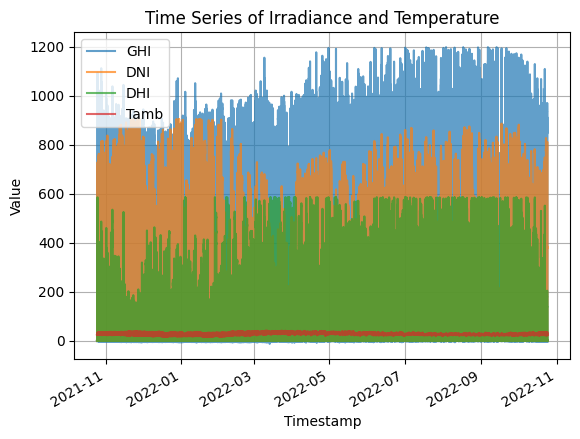

In [4]:
# Line plots for key variables
plt.figure(figsize=(15, 6))
df_clean.set_index("Timestamp")[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.7)
plt.title("Time Series of Irradiance and Temperature")
plt.ylabel("Value")
plt.grid(True)
plt.show()


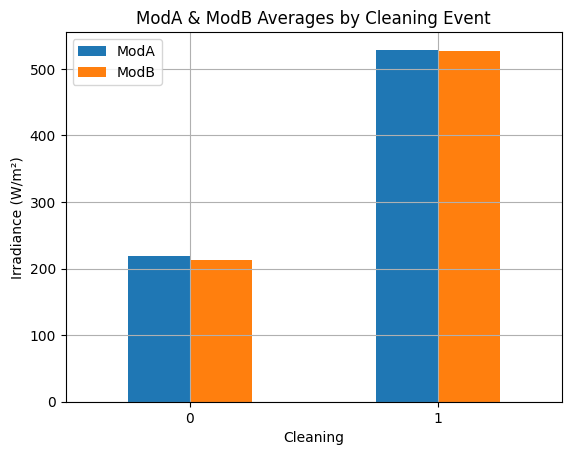

In [5]:
# Group by cleaning flag
cleaning_groups = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
cleaning_groups.plot(kind='bar', title="ModA & ModB Averages by Cleaning Event")
plt.ylabel("Irradiance (W/m²)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


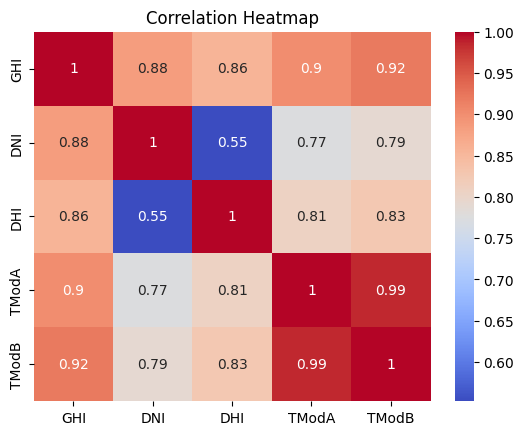

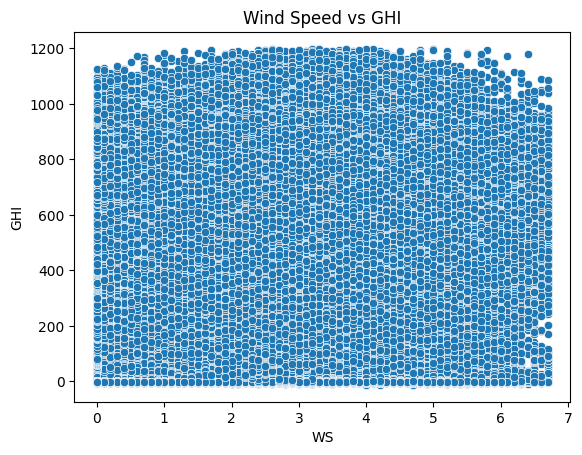

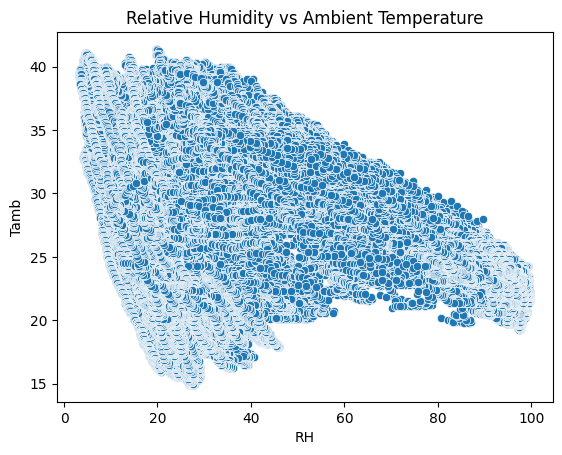

In [6]:
# Heatmap
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()


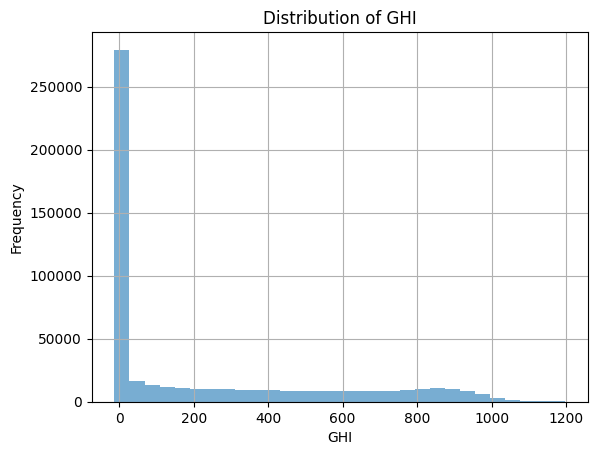

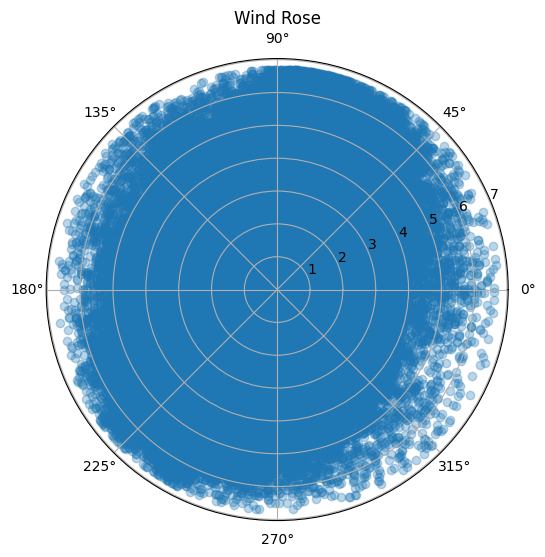

In [7]:
# Histogram
df_clean['GHI'].hist(bins=30, alpha=0.6)
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Wind rose (basic version using polar plot)
wind_data = df_clean[['WS', 'WD']].dropna()
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
theta = np.deg2rad(wind_data['WD'])
r = wind_data['WS']
ax.scatter(theta, r, alpha=0.3)
ax.set_title("Wind Rose")
plt.show()


c:\Users\HP ENVY\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


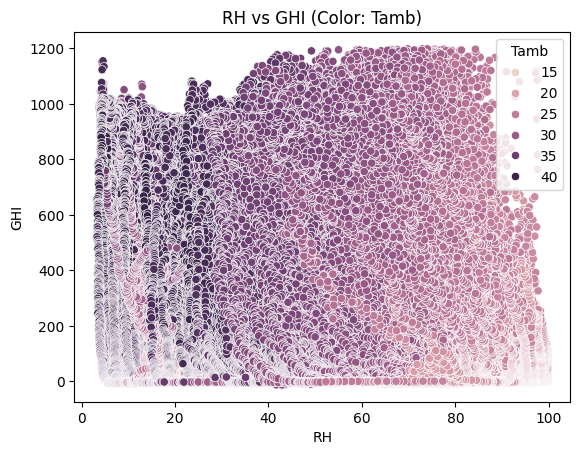

In [8]:
sns.scatterplot(data=df_clean, x='RH', y='GHI', hue='Tamb')
plt.title("RH vs GHI (Color: Tamb)")
plt.show()


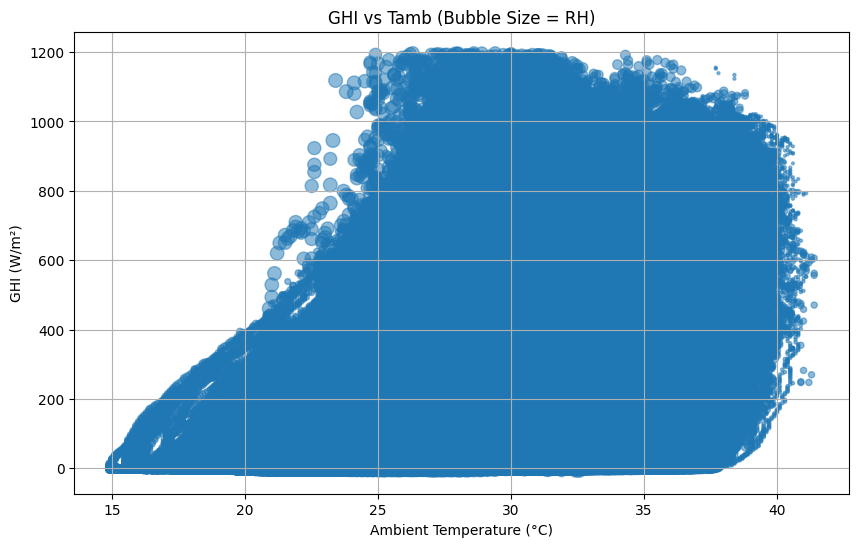

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.grid(True)
plt.show()
